## Customer Churn Dataset


#### Domain - Telecommunication
#### Dataset - Click here to download the dataset:https://drive.google.com/file/d/1Wp2ioU0gHFyFEA2NJ10-IjzmMCsUbWEe/view?usp=sharing


#### The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


### Business Understanding

The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. Three main strategies have been proposed to generate more revenues: 
1. Acquire new customers 
2. Upsell the existing customers
3. Increase the retention period of customers 
However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy, proving that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as "the customer movement from one provider to another".

Customer churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent a potentially large additional revenue source if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.

Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide. Even though it is not the most fun to look at, customer churn metrics can help businesses improve customer retention.


#### Problem Statement :
- Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

#### Task - Prepare the Data and build a model to predict the churn of a customer.

### Importing Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

### Step - 1: Load the data

In [7]:
churn=pd.read_csv(r"C:\Users\Irfan\Downloads\churn_dataset.csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)

In [8]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
## Typeconversion

In [13]:
churn['TotalCharges']=churn['TotalCharges'].replace(' ',np.nan)

In [14]:
churn['TotalCharges']=churn['TotalCharges'].astype(float)

In [15]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
churn.drop('customerID',axis=1,inplace=True)

## KNN-IMPUTER

In [17]:
sep = '-'
df= pd.get_dummies(churn, prefix_sep=sep)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender-Female,gender-Male,Partner-No,Partner-Yes,Dependents-No,Dependents-Yes,...,Contract-One year,Contract-Two year,PaperlessBilling-No,PaperlessBilling-Yes,PaymentMethod-Bank transfer (automatic),PaymentMethod-Credit card (automatic),PaymentMethod-Electronic check,PaymentMethod-Mailed check,Churn-No,Churn-Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [19]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender-Female,gender-Male,Partner-No,Partner-Yes,Dependents-No,Dependents-Yes,...,Contract-One year,Contract-Two year,PaperlessBilling-No,PaperlessBilling-Yes,PaymentMethod-Bank transfer (automatic),PaymentMethod-Credit card (automatic),PaymentMethod-Electronic check,PaymentMethod-Mailed check,Churn-No,Churn-Yes
0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,2.0,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,2.0,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
df1.TotalCharges.isnull().sum()

0

In [21]:
dfs = []
    
dummy_cols = list(set(col.split(sep)[0] for col in df1.columns if sep in col))
other_cols = [col for col in df1.columns if sep not in col]

for col in dummy_cols:
    dfs.append(df1.filter(regex=col).rename(columns=lambda name: name.split(sep)[1]).idxmax(axis=1))

df2 = pd.concat(dfs + [df1[other_cols]], axis=1)
df2.columns = dummy_cols + other_cols 
df2

,PaperlessBilling,OnlineSecurity,Contract,Partner,StreamingMovies,TechSupport,Dependents,StreamingTV,Churn,MultipleLines,InternetService,gender,PhoneService,PaymentMethod,DeviceProtection,OnlineBackup,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Yes,No,Month,Yes,No,No,No,No,No,No phone service,DSL,Female,No,Electronic check,No,Yes,0.0,1.0,29.85,29.85
1,No,Yes,One year,No,No,No,No,No,No,No,DSL,Male,Yes,Mailed check,Yes,No,0.0,34.0,56.95,1889.50
2,Yes,Yes,Month,No,No,No,No,No,Yes,No,DSL,Male,Yes,Mailed check,No,Yes,0.0,2.0,53.85,108.15
3,No,Yes,One year,No,No,Yes,No,No,No,No phone service,DSL,Male,No,Bank transfer (automatic),Yes,No,0.0,45.0,42.30,1840.75
4,Yes,No,Month,No,No,No,No,No,Yes,No,Fiber optic,Female,Yes,Electronic check,No,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,One year,Yes,Yes,Yes,Yes,Yes,No,Yes,DSL,Male,Yes,Mailed check,Yes,No,0.0,24.0,84.80,1990.50
7039,Yes,No,One year,Yes,Yes,No,Yes,Yes,No,Yes,Fiber optic,Female,Yes,Credit card (automatic),Yes,Yes,0.0,72.0,103.20,7362.90
7040,Yes,Yes,Month,Yes,No,No,Yes,No,No,No phone service,DSL,Female,No,Electronic check,No,No,0.0,11.0,29.60,346.45
7041,Yes,No,Month,Yes,No,No,No,No,Yes,Yes,Fiber optic,Male,Yes,Mailed check,No,No,1.0,4.0,74.40,306.60


In [22]:
df2.isnull().sum()

PaperlessBilling    0
OnlineSecurity      0
Contract            0
Partner             0
StreamingMovies     0
TechSupport         0
Dependents          0
StreamingTV         0
Churn               0
MultipleLines       0
InternetService     0
gender              0
PhoneService        0
PaymentMethod       0
DeviceProtection    0
OnlineBackup        0
SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PaperlessBilling  7043 non-null   object 
 1   OnlineSecurity    7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   StreamingMovies   7043 non-null   object 
 5   TechSupport       7043 non-null   object 
 6   Dependents        7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  gender            7043 non-null   object 
 12  PhoneService      7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  SeniorCitizen     7043 non-null   float64


In [24]:
num=df2.select_dtypes(include='number')
cat=df2.select_dtypes(exclude='number')

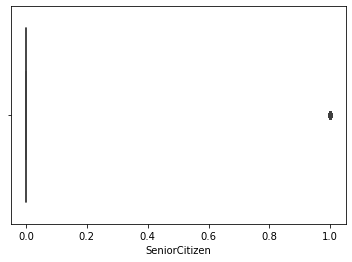

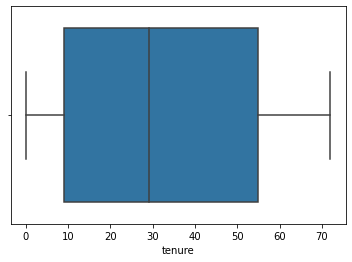

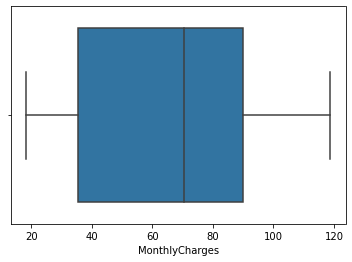

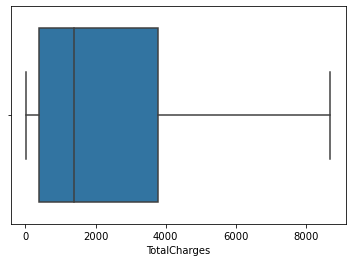

In [25]:
for i in num:
    sns.boxplot(df2[i])
    plt.show()

In [26]:
df2.duplicated().sum()

22

In [27]:
### Removing_duplicates
df2.drop_duplicates(inplace=True)

In [28]:
df2

,PaperlessBilling,OnlineSecurity,Contract,Partner,StreamingMovies,TechSupport,Dependents,StreamingTV,Churn,MultipleLines,InternetService,gender,PhoneService,PaymentMethod,DeviceProtection,OnlineBackup,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Yes,No,Month,Yes,No,No,No,No,No,No phone service,DSL,Female,No,Electronic check,No,Yes,0.0,1.0,29.85,29.85
1,No,Yes,One year,No,No,No,No,No,No,No,DSL,Male,Yes,Mailed check,Yes,No,0.0,34.0,56.95,1889.50
2,Yes,Yes,Month,No,No,No,No,No,Yes,No,DSL,Male,Yes,Mailed check,No,Yes,0.0,2.0,53.85,108.15
3,No,Yes,One year,No,No,Yes,No,No,No,No phone service,DSL,Male,No,Bank transfer (automatic),Yes,No,0.0,45.0,42.30,1840.75
4,Yes,No,Month,No,No,No,No,No,Yes,No,Fiber optic,Female,Yes,Electronic check,No,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,One year,Yes,Yes,Yes,Yes,Yes,No,Yes,DSL,Male,Yes,Mailed check,Yes,No,0.0,24.0,84.80,1990.50
7039,Yes,No,One year,Yes,Yes,No,Yes,Yes,No,Yes,Fiber optic,Female,Yes,Credit card (automatic),Yes,Yes,0.0,72.0,103.20,7362.90
7040,Yes,Yes,Month,Yes,No,No,Yes,No,No,No phone service,DSL,Female,No,Electronic check,No,No,0.0,11.0,29.60,346.45
7041,Yes,No,Month,Yes,No,No,No,No,Yes,Yes,Fiber optic,Male,Yes,Mailed check,No,No,1.0,4.0,74.40,306.60


In [29]:
import os
os.getcwd()
df2.to_csv('churn.csv')

In [30]:
churn=pd.read_csv("churn.csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)
churn

,PaperlessBilling,OnlineSecurity,Contract,Partner,StreamingMovies,TechSupport,Dependents,StreamingTV,Churn,MultipleLines,InternetService,gender,PhoneService,PaymentMethod,DeviceProtection,OnlineBackup,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Yes,No,Month,Yes,No,No,No,No,No,No phone service,DSL,Female,No,Electronic check,No,Yes,0.0,1.0,29.85,29.85
1,No,Yes,One year,No,No,No,No,No,No,No,DSL,Male,Yes,Mailed check,Yes,No,0.0,34.0,56.95,1889.50
2,Yes,Yes,Month,No,No,No,No,No,Yes,No,DSL,Male,Yes,Mailed check,No,Yes,0.0,2.0,53.85,108.15
3,No,Yes,One year,No,No,Yes,No,No,No,No phone service,DSL,Male,No,Bank transfer (automatic),Yes,No,0.0,45.0,42.30,1840.75
4,Yes,No,Month,No,No,No,No,No,Yes,No,Fiber optic,Female,Yes,Electronic check,No,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Yes,Yes,One year,Yes,Yes,Yes,Yes,Yes,No,Yes,DSL,Male,Yes,Mailed check,Yes,No,0.0,24.0,84.80,1990.50
7017,Yes,No,One year,Yes,Yes,No,Yes,Yes,No,Yes,Fiber optic,Female,Yes,Credit card (automatic),Yes,Yes,0.0,72.0,103.20,7362.90
7018,Yes,Yes,Month,Yes,No,No,Yes,No,No,No phone service,DSL,Female,No,Electronic check,No,No,0.0,11.0,29.60,346.45
7019,Yes,No,Month,Yes,No,No,No,No,Yes,Yes,Fiber optic,Male,Yes,Mailed check,No,No,1.0,4.0,74.40,306.60


In [31]:
churn.columns

Index(['PaperlessBilling', 'OnlineSecurity', 'Contract', 'Partner',
       'StreamingMovies', 'TechSupport', 'Dependents', 'StreamingTV', 'Churn',
       'MultipleLines', 'InternetService', 'gender', 'PhoneService',
       'PaymentMethod', 'DeviceProtection', 'OnlineBackup', 'SeniorCitizen',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [32]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PaperlessBilling  7021 non-null   object 
 1   OnlineSecurity    7021 non-null   object 
 2   Contract          7021 non-null   object 
 3   Partner           7021 non-null   object 
 4   StreamingMovies   7021 non-null   object 
 5   TechSupport       7021 non-null   object 
 6   Dependents        7021 non-null   object 
 7   StreamingTV       7021 non-null   object 
 8   Churn             7021 non-null   object 
 9   MultipleLines     7021 non-null   object 
 10  InternetService   7021 non-null   object 
 11  gender            7021 non-null   object 
 12  PhoneService      7021 non-null   object 
 13  PaymentMethod     7021 non-null   object 
 14  DeviceProtection  7021 non-null   object 
 15  OnlineBackup      7021 non-null   object 
 16  SeniorCitizen     7021 non-null   float64


## Feature Selection

In [33]:
X=churn[[ 'gender', 'Partner', 'Dependents',"SeniorCitizen",
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y=churn['Churn']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(5265, 19) (5265,)
(1756, 19) (1756,)


In [35]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_cat=X_train.select_dtypes(include='object')

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_num_trans = pd.DataFrame(sc.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_train_num_trans.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4903,-0.445837,1.624132,0.323859,1.388862
4207,2.242973,-0.751400,0.342080,-0.559629
2498,-0.445837,0.477324,-1.463446,-0.598160
4405,-0.445837,1.378387,0.043920,0.946787
1916,-0.445837,-0.423740,-1.468416,-0.798620


In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat),
                               columns=ohe.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)
X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4903,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4207,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2498,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4405,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1916,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
X_train_transformed = pd.concat([X_train_num_trans,X_train_cat_ohe],axis =1)
X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4903,-0.445837,1.624132,0.323859,1.388862,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4207,2.242973,-0.751400,0.342080,-0.559629,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2498,-0.445837,0.477324,-1.463446,-0.598160,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4405,-0.445837,1.378387,0.043920,0.946787,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1916,-0.445837,-0.423740,-1.468416,-0.798620,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_cat=X_test.select_dtypes(include='object')

In [44]:
X_test_num_trans = pd.DataFrame(sc.transform(X_test_num),columns=X_test_num.columns,index = X_test_num.index)
X_test_num_trans.head()

X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat),
                             columns=ohe.get_feature_names_out(X_test_cat.columns),
                             index = X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3909,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2462,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2879,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3761,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3745,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
X_test_transformed = pd.concat([X_test_num_trans,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3909,-0.445837,-0.505655,0.842327,-0.222978,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2462,-0.445837,0.682111,1.099076,1.162686,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2879,2.242973,1.419345,1.700366,2.451571,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3761,-0.445837,1.009770,-1.486637,-0.514526,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3745,-0.445837,-1.283847,-1.180194,-0.993764,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train_transformed, y_train)

predictions = model_rf.predict(X_test_transformed)

In [47]:
model_rf.feature_importances_

array([0.02098073, 0.1787321 , 0.16394769, 0.19064005, 0.02925354,
       0.02327538, 0.01925585, 0.00424196, 0.00414905, 0.01971377,
       0.03775542, 0.00637023, 0.00442421, 0.02558616, 0.00404186,
       0.02237962, 0.00535154, 0.01919491, 0.00698828, 0.02347822,
       0.0073804 , 0.01719843, 0.00429405, 0.01859827, 0.02186307,
       0.02766249, 0.0267138 , 0.01349313, 0.04044949, 0.01258629])

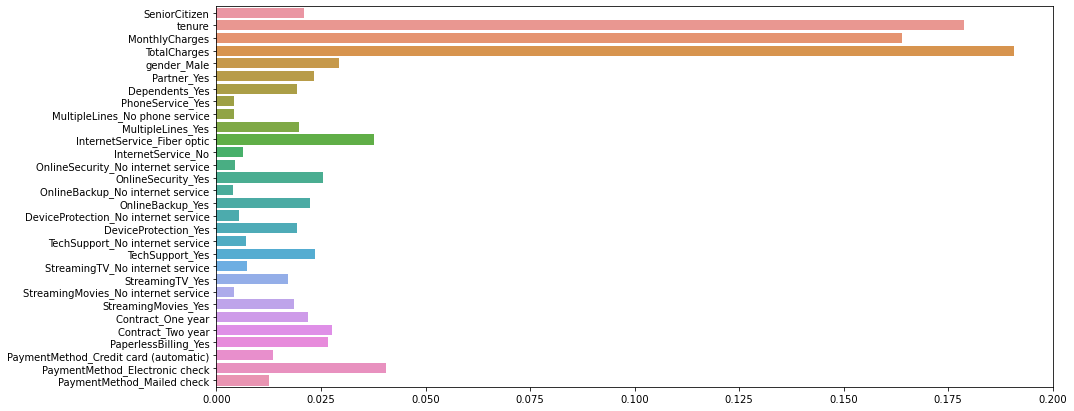

In [48]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train_transformed.columns, )
plt.show();

#### Step - 2: Document the below mentioned points properly:

- Inputvariables:gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,
   OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,
   PaymentMethod,MonthlyCharges,TotalCharges.
- Target variable:Churn
- Type:Supervised Learning(since target variable is given).
- Task:classification
- Identify the Evaluation Metric.
- classification task: Accuracy

In [49]:
X=churn[['tenure', 'PhoneService', 'InternetService',
        'Contract','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y=churn['Churn']

### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5265, 7) (5265,)
(1756, 7) (1756,)


In [51]:
churn['PaymentMethod'].value_counts()

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [52]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_cat=X_train.select_dtypes(include='object')


### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_trans = pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_train_num_trans.head()

,tenure,MonthlyCharges,TotalCharges
4903,1.624132,0.323859,1.388862
4207,-0.751400,0.342080,-0.559629
2498,0.477324,-1.463446,-0.598160
4405,1.378387,0.043920,0.946787
1916,-0.423740,-1.468416,-0.798620


In [55]:
from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                               columns=encoder_.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)
X_train_cat_ohe.head()

,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4903,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4207,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2498,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4405,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1916,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## concat train_data

In [56]:
X_train_transformed = pd.concat([X_train_num_trans,X_train_cat_ohe],axis =1)
X_train_transformed.head()


,tenure,MonthlyCharges,TotalCharges,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4903,1.624132,0.323859,1.388862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4207,-0.751400,0.342080,-0.559629,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2498,0.477324,-1.463446,-0.598160,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4405,1.378387,0.043920,0.946787,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1916,-0.423740,-1.468416,-0.798620,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [57]:
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_cat=X_test.select_dtypes(include='object')

In [58]:
X_test_num_trans = pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index = X_test_num.index)
X_test_num_trans.head()

,tenure,MonthlyCharges,TotalCharges
3909,-0.505655,0.842327,-0.222978
2462,0.682111,1.099076,1.162686
2879,1.419345,1.700366,2.451571
3761,1.009770,-1.486637,-0.514526
3745,-1.283847,-1.180194,-0.993764


In [59]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat),
                             columns=encoder_.get_feature_names_out(X_test_cat.columns),
                             index = X_test_cat.index)
X_test_cat_ohe.head()

,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3909,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2462,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2879,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3761,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Concat test data

In [60]:
X_test_transformed = pd.concat([X_test_num_trans,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3909,-0.505655,0.842327,-0.222978,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2462,0.682111,1.099076,1.162686,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2879,1.419345,1.700366,2.451571,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3761,1.009770,-1.486637,-0.514526,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3745,-1.283847,-1.180194,-0.993764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest
### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict).
### Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction.

In [61]:
Algorithm=[]
Accuracy_score=[]
Precision_score=[]
# Confusion_matrix=[]
F1_score=[]
Roc_Auc_Score=[]
Log_Los=[]

In [62]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=0.01, solver='liblinear')
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("LogisticRegression")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

print(a)

0.7966970387243736


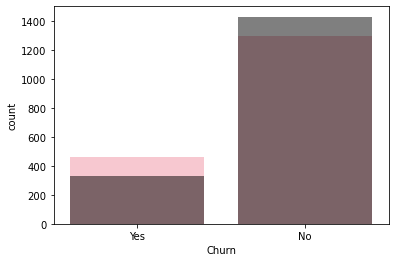

In [63]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [55]:
tuned_parameters = [{"penalty":['l1',"l2"]},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
clf = GridSearchCV(estimator = LogisticRegression(solver='liblinear'),  
                           param_grid = tuned_parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           return_train_score=True,
                           verbose=1,
                            )


clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [56]:

print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'C': 0.01}
LogisticRegression(C=0.01, solver='liblinear')

Score on Test Data:  0.7966970387243736


In [57]:


df=pd.DataFrame(clf.cv_results_)
df[df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.008965,0.000628,0.002527,0.00053,NaN,0.01,{'C': 0.01},0.794872,0.811966,0.787274,...,0.80057,0.008766,1,0.799858,0.797009,0.802469,0.798908,0.797958,0.79924,0.001873


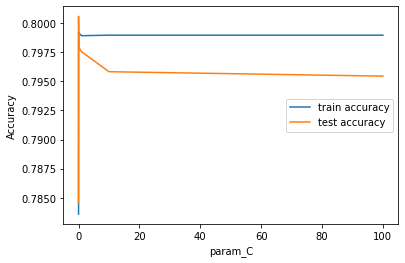

In [58]:
plt.plot(df['param_C'], df['mean_train_score'])
plt.plot(df['param_C'], df['mean_test_score'])
plt.xlabel('param_C')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='right')


In [246]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classification=KNeighborsClassifier(n_neighbors=14, p=3)
KNN_classification.fit(X_train_transformed,y_train)
y_test_pred=KNN_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
# Log_Los.append(metrics.log_loss(y_test,y_test_pred))

print(a)

0.7727790432801822


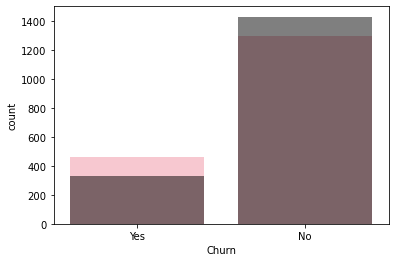

In [247]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [61]:
tuned_parameters = [{'n_neighbors':[i for i in range(1,51)], 'p':[1, 2, 3]}]
clf = GridSearchCV(estimator = KNeighborsClassifier(),  
                           param_grid = tuned_parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           return_train_score=True,
                           verbose=1)


clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [62]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()
print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_neighbors': 14, 'p': 3}
KNeighborsClassifier(n_neighbors=14, p=3)

Score on Test Data:  0.7727790432801822


In [63]:


df1=pd.DataFrame(clf.cv_results_)
df1[df1['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
41,0.012967,0.004199,0.122335,0.020115,14,3,"{'n_neighbors': 14, 'p': 3}",0.795821,0.79867,0.791073,...,0.794682,0.003086,1,0.817664,0.816239,0.815764,0.816477,0.812915,0.815812,0.001578


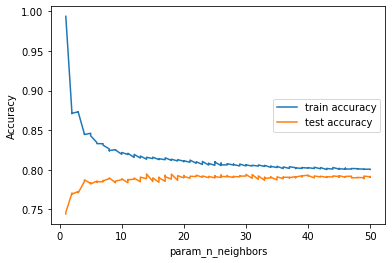

In [64]:
plt.plot(df1['param_n_neighbors'], df1['mean_train_score'])
plt.plot(df1['param_n_neighbors'], df1['mean_test_score'])
plt.xlabel('param_n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='right')

In [248]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth=5)
dc.fit(X_train_transformed,y_train)
y_test_pred = dc.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.780751708428246


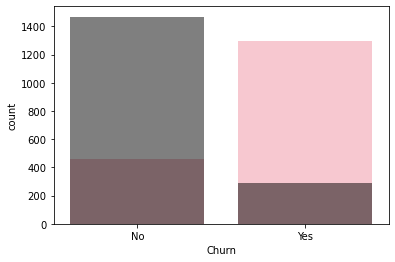

In [249]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [67]:
tuned_parameters = [{'max_depth':[i for i in range(1,51)]}]
clf = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = tuned_parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           return_train_score=True,
                           verbose=1)


clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [68]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()
print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)

Score on Test Data:  0.7801822323462415


In [69]:
df2=pd.DataFrame(clf.cv_results_)
df2[df2['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.013976,0.00514,0.003168,0.000797,5,{'max_depth': 5},0.784425,0.795821,0.790123,0.782526,...,0.788224,0.004652,1,0.802944,0.801282,0.803656,0.801045,0.802469,0.802279,0.000989


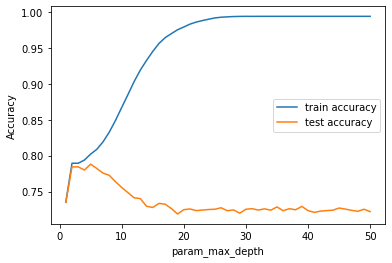

In [70]:
plt.plot(df2['param_max_depth'], df2['mean_train_score'])
plt.plot(df2['param_max_depth'], df2['mean_test_score'])
plt.xlabel('param_max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='right')

In [250]:
from sklearn.svm import SVC
sv = SVC(C=10)
sv.fit(X_train_transformed,y_train)
y_test_pred = sv.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("Support Vector classification")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

print(a)

0.8006833712984055


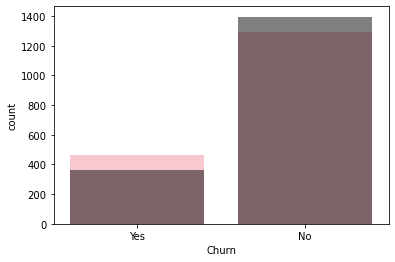

In [251]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [73]:

tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(estimator = SVC(),  
                           param_grid = tuned_parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           return_train_score=True,
                           verbose=1)


clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': array([0.32222919, 0.54598832, 0.26275966]),
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [74]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()
print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'C': 10, 'gamma': 0.2627596608259991, 'kernel': 'rbf'}
SVC(C=10, gamma=0.2627596608259991)

Score on Test Data:  0.8006833712984055


In [75]:
df3=pd.DataFrame(clf.cv_results_)
df3[df3['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.682244,0.02656,0.215307,0.00981,10,0.26276,rbf,"{'C': 10, 'gamma': 0.2627596608259991, 'kernel...",0.793922,0.807217,...,0.8,0.007122,1,0.804843,0.797483,0.805081,0.801045,0.800807,0.801852,0.002836


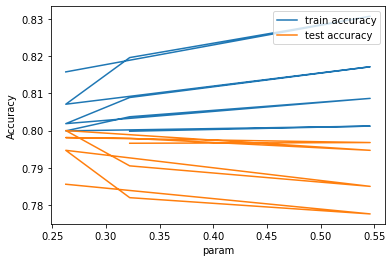

In [76]:
plt.plot(df3['param_gamma'], df3['mean_train_score'])
plt.plot(df3['param_gamma'], df3['mean_test_score'])
plt.xlabel('param')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

In [252]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed,y_train)
y_test_pred = rf.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("RandomForestClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

print(a)

0.7670842824601367


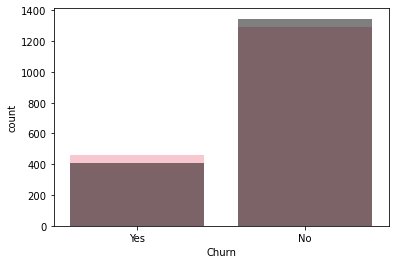

In [253]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [254]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_transformed,y_train)
y_test_pred = gb.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("GradientBoostingClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.7881548974943052


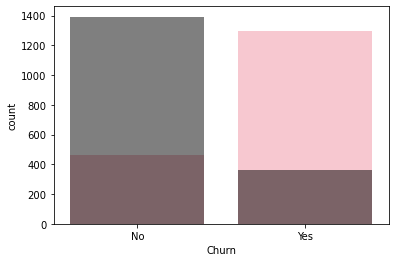

In [255]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [256]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train_transformed,y_train)
y_test_pred = ab.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("AdaBoostClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.780751708428246


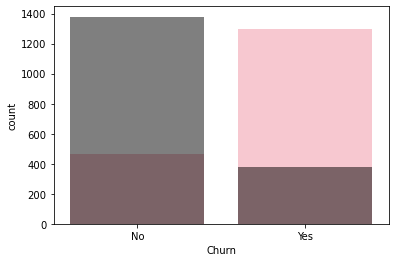

In [257]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [83]:
y_train_pred = ab.predict(X_train_transformed)
train_score = metrics.accuracy_score(y_train, y_train_pred)
train_score

0.8032288698955365

In [258]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train_transformed,y_train)
y_test_pred = nb.predict(X_test_transformed)
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("Naive bayes Algorithem")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(a)

0.7733485193621867


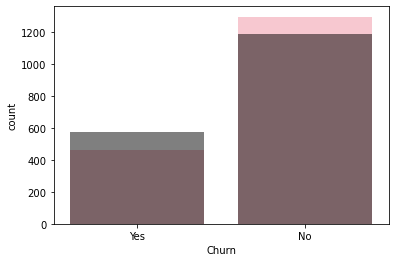

In [259]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [260]:
overview=pd.DataFrame({"Accuracy_score":Accuracy_score,'Precision_score':Precision_score,'F1_score':F1_score},index=Algorithm)
overview

,Accuracy_score,Precision_score,F1_score
LogisticRegression,0.796697,0.827852,0.868895
KNeighborsClassifier,0.772779,0.813156,0.853470
DecisionTreeClassifier,0.780752,0.809394,0.860659
Support Vector classification,0.800683,0.838109,0.869888
RandomForestClassifier,0.767084,0.828996,0.845017
GradientBoostingClassifier,0.788155,0.831178,0.861504
AdaBoostClassifier,0.780752,0.829587,0.855967
Naive bayes Algorithem,0.773349,0.878378,0.839387


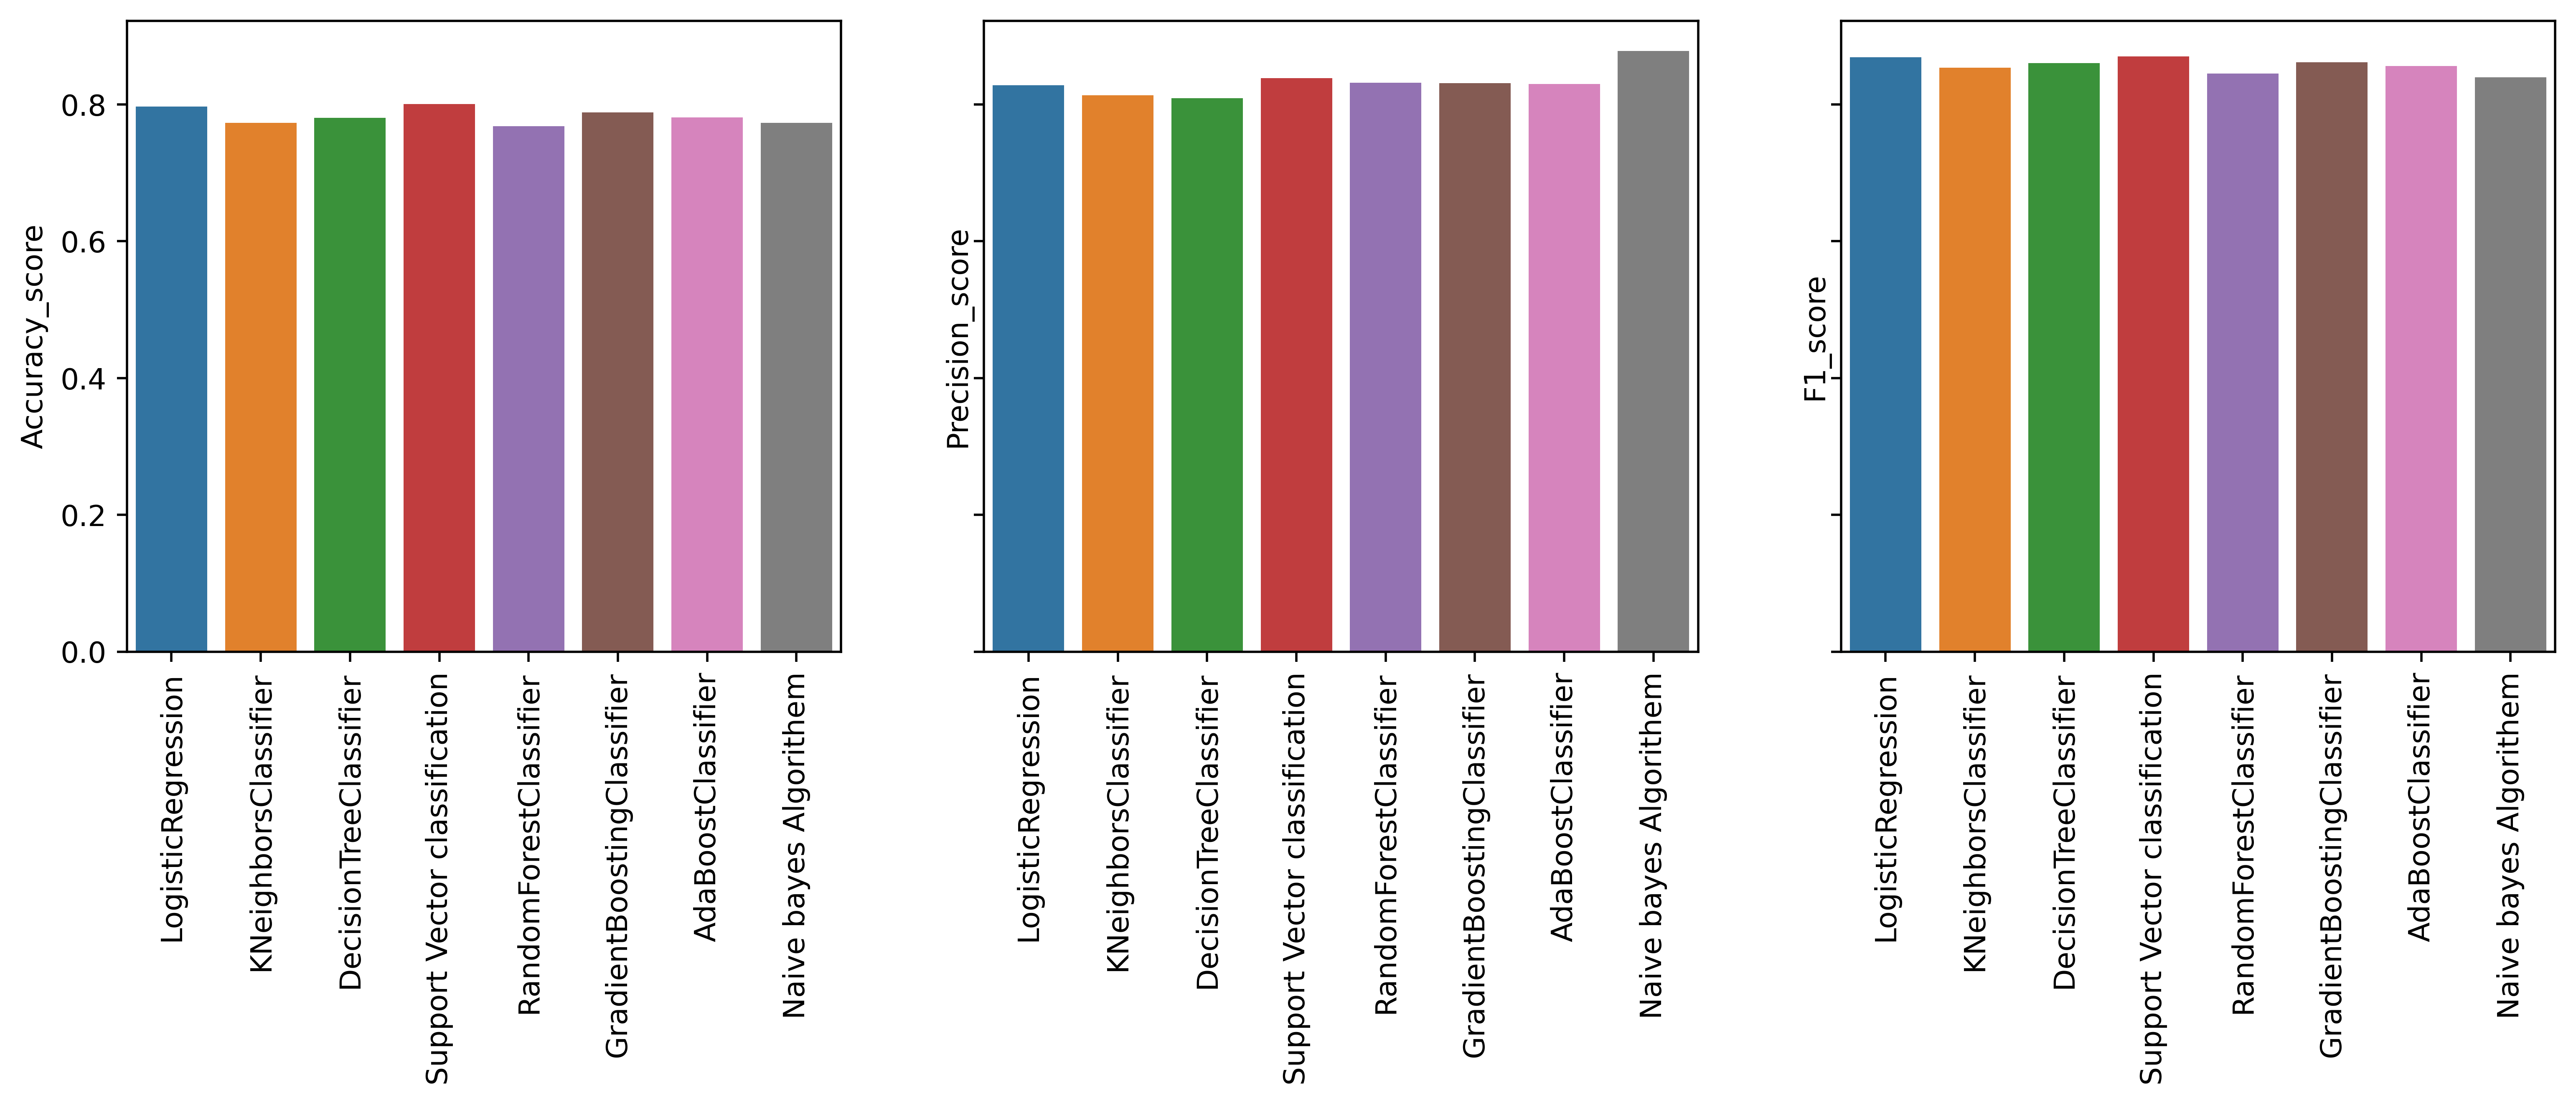

In [87]:
fig, axes = plt.subplots(1,3, figsize = (15,4),dpi=500,sharey=True)
a=overview.index
sns.barplot(y=overview.Accuracy_score,x=a,ax=axes[0])
sns.barplot(y=overview.Precision_score,x=a,ax=axes[1])
sns.barplot(y=overview.F1_score,x=a,ax=axes[2])
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.sca(axes[2])
plt.xticks(rotation=90)
plt.show()

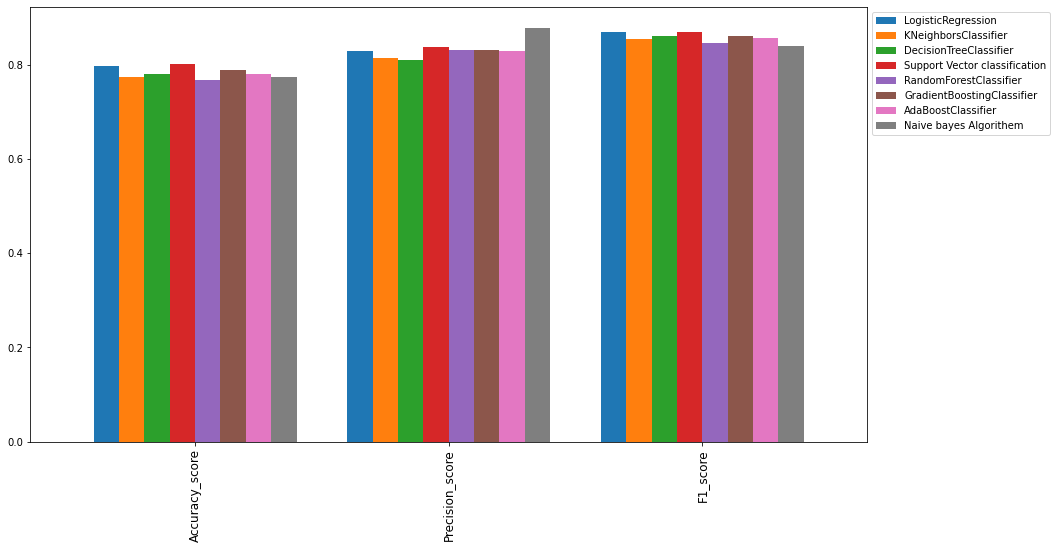

In [88]:
fig,axes=plt.subplots(figsize=(15,8))
overview.T.plot(ax=axes,kind='bar',width=0.8,align='center',alpha=1.0)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize=12);

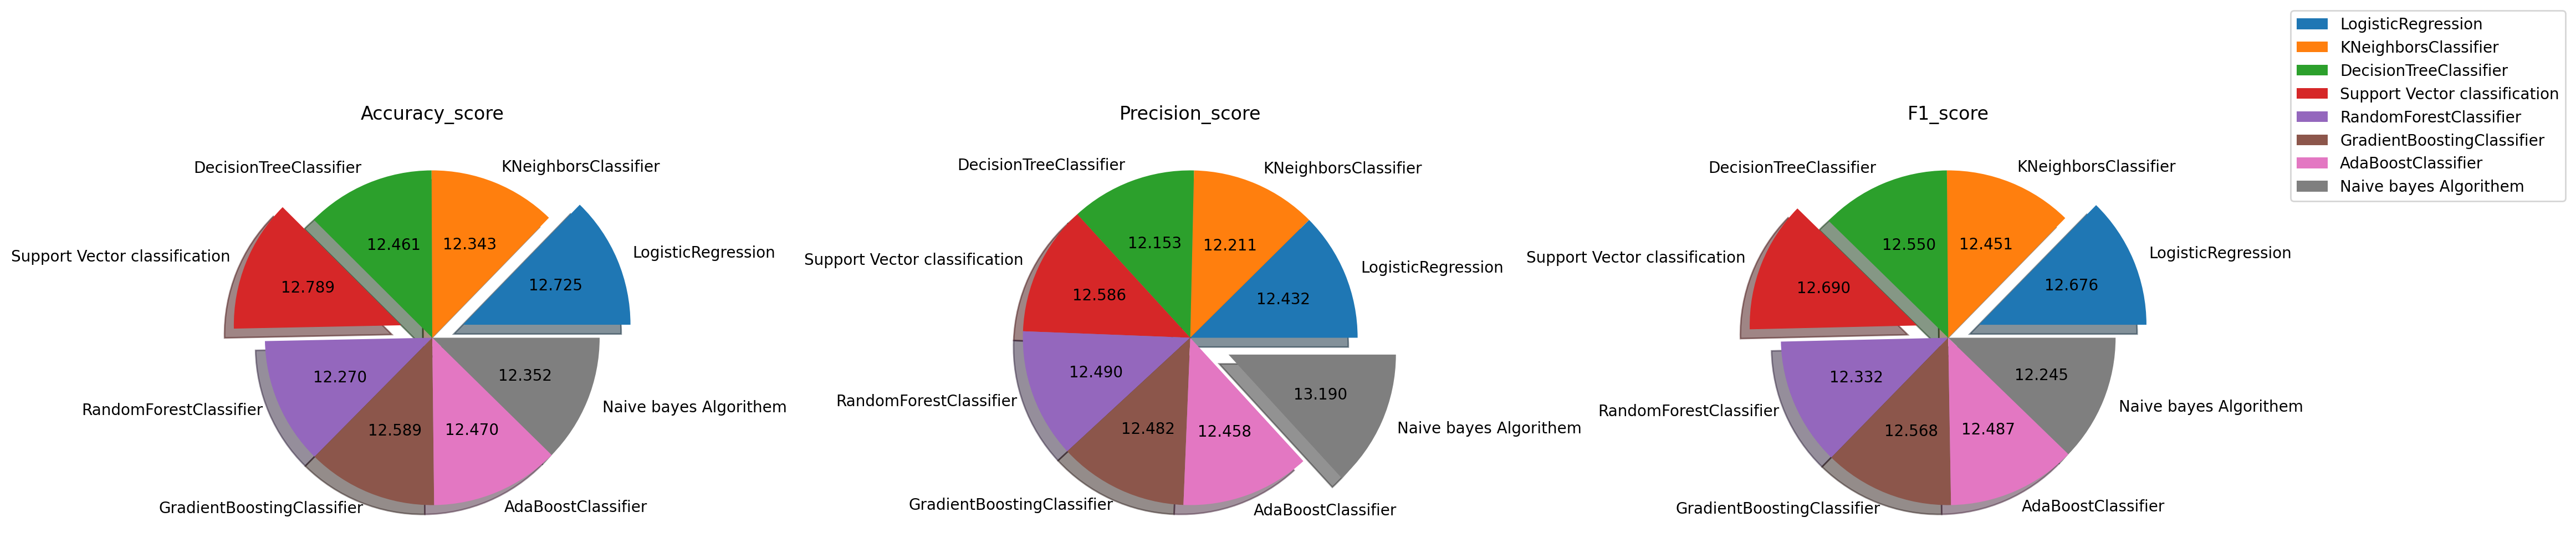

In [89]:
fig,axes=plt.subplots(1,3,figsize=(25,5),dpi=200)
overview['Accuracy_score'].plot(ax=axes[0],kind='pie',explode=[0.2,0,0,0.2,0,0,0,0],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
axes[0].title.set_text('Accuracy_score')
overview['Precision_score'].plot(ax=axes[1],kind='pie',explode=[0,0,0,0,0,0,0,0.25],ylabel=' ',autopct='%.3f',shadow=True)
axes[1].title.set_text('Precision_score')
overview['F1_score'].plot(ax=axes[2],kind='pie',explode=[0.2,0,0,0.2,0,0,0,0],ylabel=' ',autopct='%.3f',shadow=True)
plt.legend(bbox_to_anchor=(1.3,1.3));
axes[2].title.set_text('F1_score')



### Conclusion:
#### usig Accuracy_Score evalution matrix
Logestic Regression and Support Vector classification algorithms are the best model for Churn Prediction
Logestic Regression and Support Vector classification algorithms are more compare to the other models.
#### usig F1_score evalution matrix
Logestic Regression and Support Vector classification algorithms are the best model for Churn Prediction
Logestic Regression and Support Vector classification algorithms are more compare to the other models.
#### usig Precision_Score evalution matrix
Naive Bayes algorithm is the best model for Churn Prediction
Becuase Naive Bayes Accuracy is more compare to the other models.

## SPRINT 2 - Exploratory Data Analysis

In [90]:
churn=pd.read_csv("churn.csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)
churn

,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,PhoneService,Dependents,DeviceProtection,Partner,Churn,Contract,TechSupport,OnlineBackup,InternetService,gender,OnlineSecurity,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,No phone service,No,No,Yes,Electronic check,No,No,No,Yes,No,Month,No,Yes,DSL,Female,No,0.0,1.0,29.85,29.85
1,No,No,No,No,Mailed check,Yes,No,Yes,No,No,One year,No,No,DSL,Male,Yes,0.0,34.0,56.95,1889.50
2,No,No,No,Yes,Mailed check,Yes,No,No,No,Yes,Month,No,Yes,DSL,Male,Yes,0.0,2.0,53.85,108.15
3,No phone service,No,No,No,Bank transfer (automatic),No,No,Yes,No,No,One year,Yes,No,DSL,Male,Yes,0.0,45.0,42.30,1840.75
4,No,No,No,Yes,Electronic check,Yes,No,No,No,Yes,Month,No,No,Fiber optic,Female,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Yes,Yes,Yes,Yes,Mailed check,Yes,Yes,Yes,Yes,No,One year,Yes,No,DSL,Male,Yes,0.0,24.0,84.80,1990.50
7017,Yes,Yes,Yes,Yes,Credit card (automatic),Yes,Yes,Yes,Yes,No,One year,No,Yes,Fiber optic,Female,No,0.0,72.0,103.20,7362.90
7018,No phone service,No,No,Yes,Electronic check,No,Yes,No,Yes,No,Month,No,No,DSL,Female,Yes,0.0,11.0,29.60,346.45
7019,Yes,No,No,Yes,Mailed check,Yes,No,No,Yes,Yes,Month,No,No,Fiber optic,Male,No,1.0,4.0,74.40,306.60


### Univariate Analysis

In [91]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65
...,...,...,...,...
7038,0.0,24.0,84.80,1990.50
7039,0.0,72.0,103.20,7362.90
7040,0.0,11.0,29.60,346.45
7041,1.0,4.0,74.40,306.60


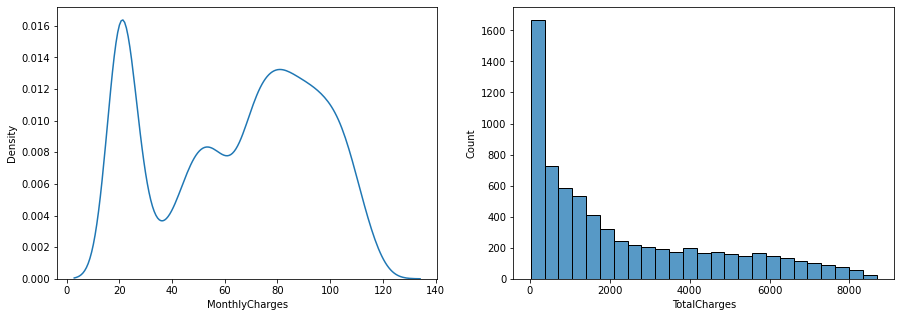

In [92]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=churn['MonthlyCharges'],data=churn,ax=axes[0])
sns.histplot(x=churn['TotalCharges'],data=churn,ax=axes[1])
plt.show()

# Observation:
- The Monthly charges have most density in the range 40-120
- The Total charges of maximum count lies between 0-2000

In [93]:
cat

,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,PhoneService,Dependents,DeviceProtection,Partner,Churn,Contract,TechSupport,OnlineBackup,InternetService,gender,OnlineSecurity
0,No phone service,No,No,Yes,Electronic check,No,No,No,Yes,No,Month,No,Yes,DSL,Female,No
1,No,No,No,No,Mailed check,Yes,No,Yes,No,No,One year,No,No,DSL,Male,Yes
2,No,No,No,Yes,Mailed check,Yes,No,No,No,Yes,Month,No,Yes,DSL,Male,Yes
3,No phone service,No,No,No,Bank transfer (automatic),No,No,Yes,No,No,One year,Yes,No,DSL,Male,Yes
4,No,No,No,Yes,Electronic check,Yes,No,No,No,Yes,Month,No,No,Fiber optic,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,Mailed check,Yes,Yes,Yes,Yes,No,One year,Yes,No,DSL,Male,Yes
7039,Yes,Yes,Yes,Yes,Credit card (automatic),Yes,Yes,Yes,Yes,No,One year,No,Yes,Fiber optic,Female,No
7040,No phone service,No,No,Yes,Electronic check,No,Yes,No,Yes,No,Month,No,No,DSL,Female,Yes
7041,Yes,No,No,Yes,Mailed check,Yes,No,No,Yes,Yes,Month,No,No,Fiber optic,Male,No


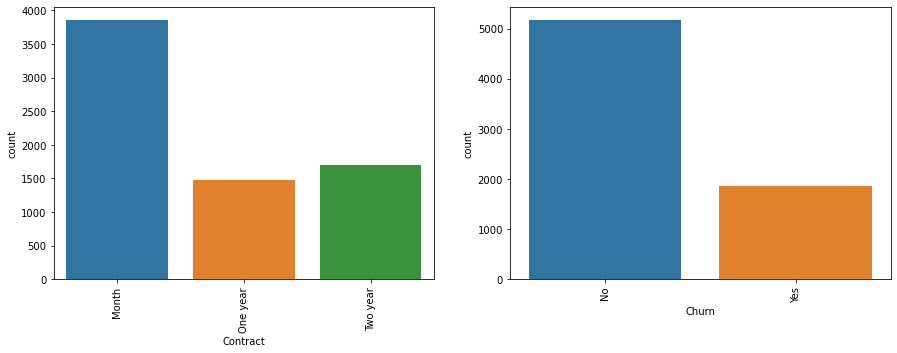

In [94]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=churn['Contract'],data=churn,ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=90)
sns.countplot(x=churn['Churn'],data=churn,ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- The month-to-Month contract count is more compare to one year and two year.
- In Churn No is having maximum count  comparing to yes. 

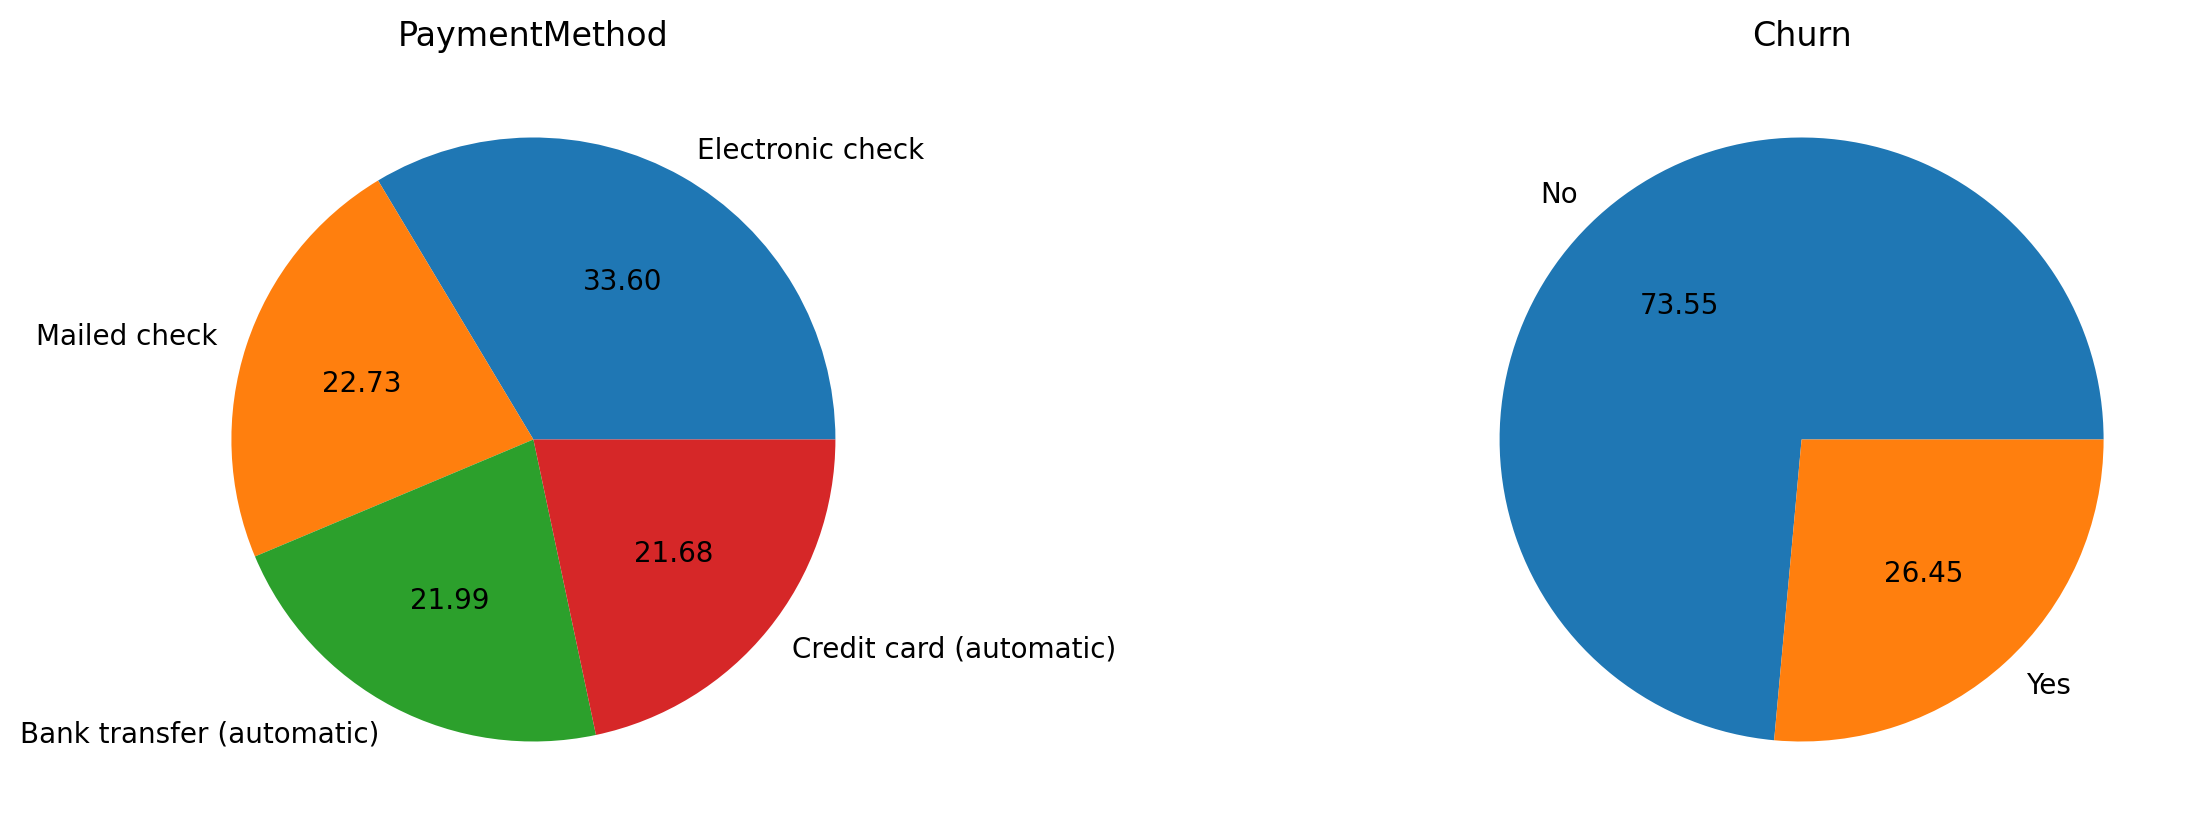

In [95]:
fig,axes=plt.subplots(1,2,figsize=(15,5),dpi=200)
churn['PaymentMethod'].value_counts().plot(kind='pie',ax=axes[0],ylabel=' ',autopct='%.2f')
axes[0].title.set_text('PaymentMethod')
churn['Churn'].value_counts().plot(kind='pie',ax=axes[1],ylabel=' ',autopct='%.2f')
axes[1].title.set_text('Churn')

# Observation:
- In payment methods The Electronic check has more percentage compare to other type of payments.
- In Churn no is occupies more percentage.

## Bi_variate analysis

In [96]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65
...,...,...,...,...
7038,0.0,24.0,84.80,1990.50
7039,0.0,72.0,103.20,7362.90
7040,0.0,11.0,29.60,346.45
7041,1.0,4.0,74.40,306.60


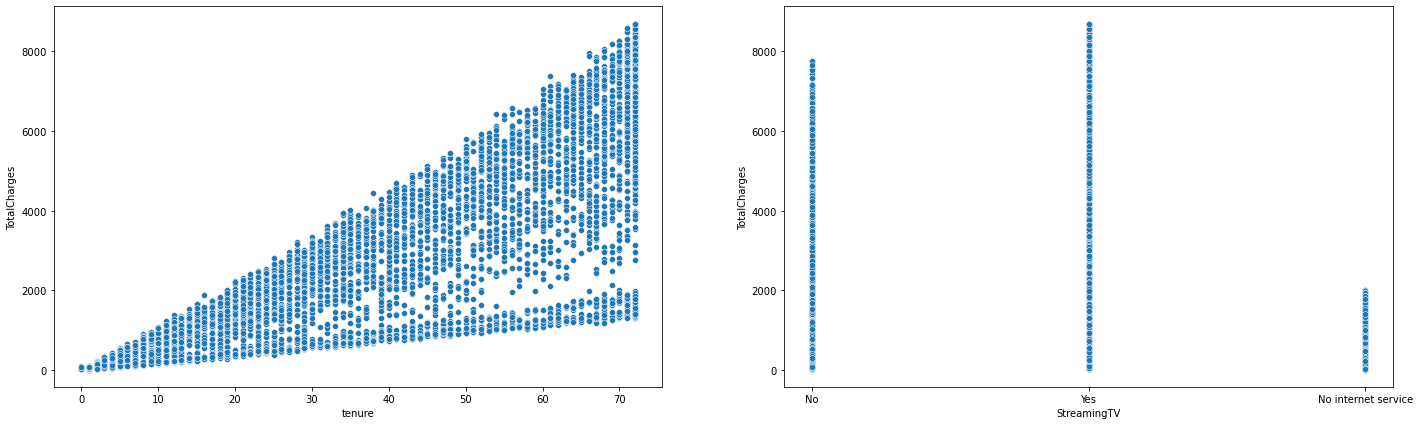

In [97]:
fig,axes=plt.subplots(1,2,figsize=(24,7))
sns.scatterplot(x=churn['tenure'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.scatterplot(x=churn['StreamingTV'],y=churn['TotalCharges'],data=churn,ax=axes[1])
plt.show()

# Observation:
- If the tenure increases the total charges are also incresed.
- In streaming Tv No internet service Total charges around 2000.

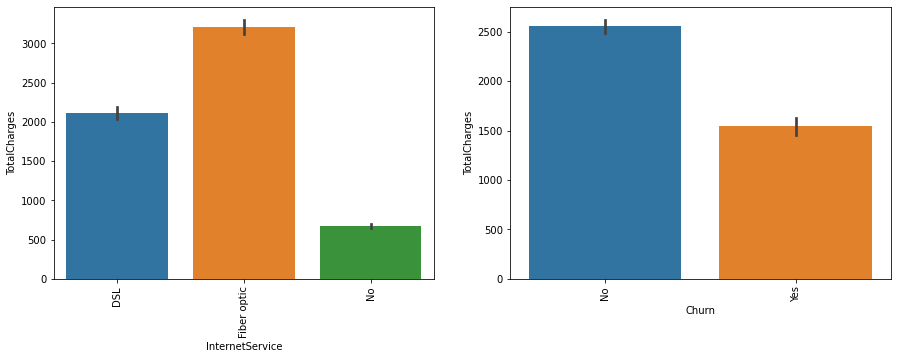

In [98]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=churn['InternetService'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.barplot(x=churn['Churn'],y=churn['TotalCharges'],data=churn)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- In internet service Fiber optic have most charges compare DSL and No
- In Churn the yes having Total_charge is around 1500.

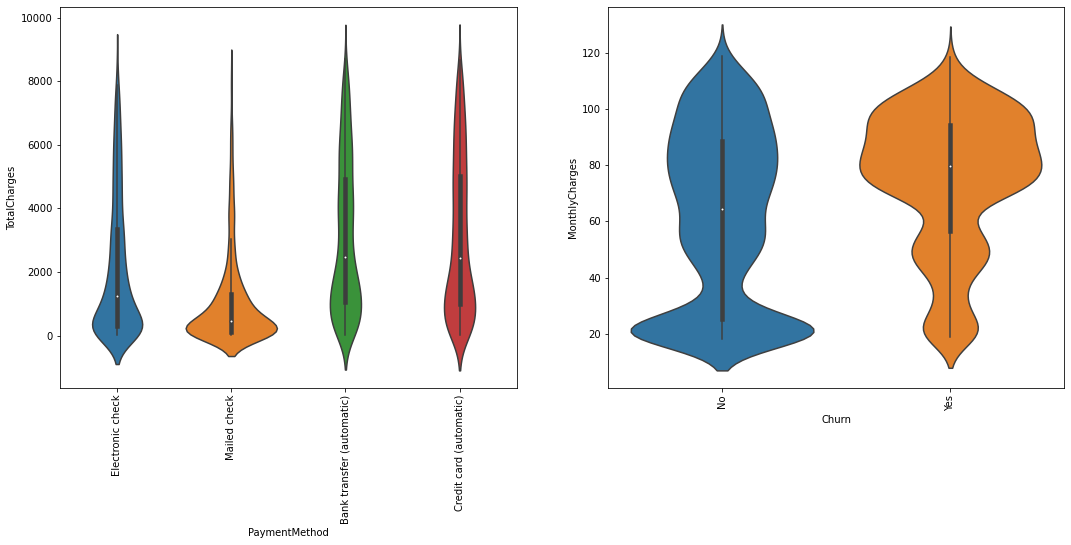

In [99]:
fig,axes=plt.subplots(1,2,figsize=(18,7))
sns.violinplot(x=churn['PaymentMethod'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.violinplot(x=churn['Churn'],y=churn['MonthlyCharges'],data=churn)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- In payment method The bank transfer automatic having most density Total_charges below 2000.
-In Churn Yes havingthe more density Monthly charges are in the rage 80-100.


In [100]:
cat

,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,PhoneService,Dependents,DeviceProtection,Partner,Churn,Contract,TechSupport,OnlineBackup,InternetService,gender,OnlineSecurity
0,No phone service,No,No,Yes,Electronic check,No,No,No,Yes,No,Month,No,Yes,DSL,Female,No
1,No,No,No,No,Mailed check,Yes,No,Yes,No,No,One year,No,No,DSL,Male,Yes
2,No,No,No,Yes,Mailed check,Yes,No,No,No,Yes,Month,No,Yes,DSL,Male,Yes
3,No phone service,No,No,No,Bank transfer (automatic),No,No,Yes,No,No,One year,Yes,No,DSL,Male,Yes
4,No,No,No,Yes,Electronic check,Yes,No,No,No,Yes,Month,No,No,Fiber optic,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,Mailed check,Yes,Yes,Yes,Yes,No,One year,Yes,No,DSL,Male,Yes
7039,Yes,Yes,Yes,Yes,Credit card (automatic),Yes,Yes,Yes,Yes,No,One year,No,Yes,Fiber optic,Female,No
7040,No phone service,No,No,Yes,Electronic check,No,Yes,No,Yes,No,Month,No,No,DSL,Female,Yes
7041,Yes,No,No,Yes,Mailed check,Yes,No,No,Yes,Yes,Month,No,No,Fiber optic,Male,No


No handles with labels found to put in legend.


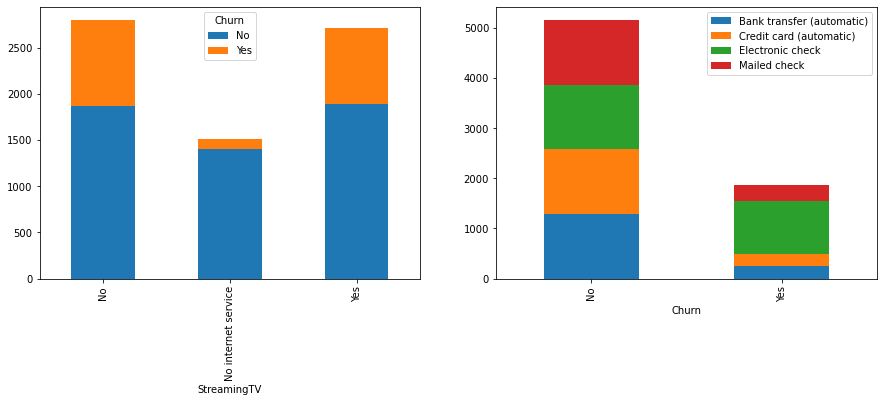

In [101]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
crosstab=pd.crosstab(churn['StreamingTV'],churn['Churn'])
crosstab.plot(kind='bar',stacked=True,ax=axes[0])
plt.legend(bbox_to_anchor=(1,1))
crosstab=pd.crosstab(churn['Churn'],churn['PaymentMethod'])
crosstab.plot(kind='bar',stacked=True,ax=axes[1])
plt.legend(bbox_to_anchor=(1,1))
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- In streaming tv evry cardinolity has less yes Churn
- In Churn yes cordinality has mastly payment method is Electronic check.

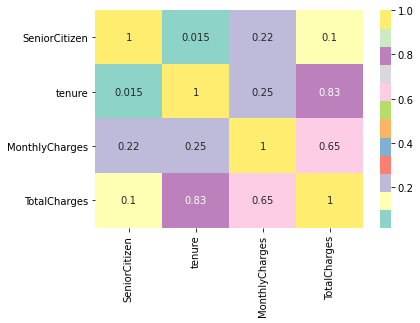

In [102]:
sns.heatmap(churn.corr(),annot=True,cmap='Set3')
plt.show()

# Observation
- tenure and Total charges has mostly positive correlation in otherend SeniorCitizen and tenure has very low positive correlation.

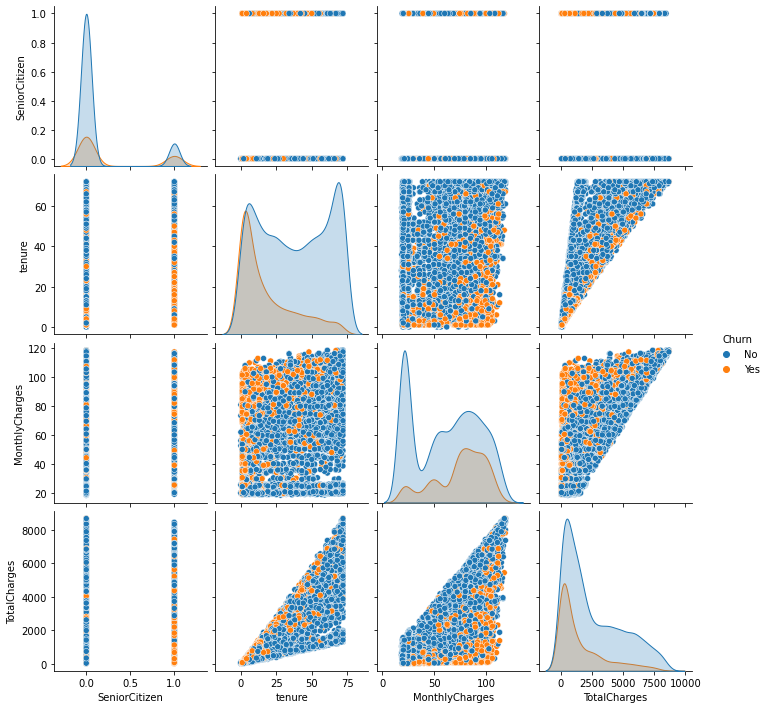

In [103]:
sns.pairplot(data=churn,hue='Churn')
plt.show()

In [65]:
from pickle import dump

dump(scaler, open('standard_scaler.pkl', 'wb'))
dump(encoder_, open('OneHot_Encoder.pkl', 'wb'))
# dump(KNN_classification, open('knn_model.pkl', 'wb'))
# dump(regressor, open('lr_model.pkl', 'wb'))
# dump(nb, open('nb_model.pkl', 'wb'))
# dump(dc, open('dt_model.pkl', 'wb'))
# dump(sv, open('sv_model.pkl', 'wb'))
# dump(ab, open('ada_model.pkl', 'wb'))
# dump(gb, open('gbdt_model.pkl', 'wb'))
# dump(rf, open('rf.pkl', 'wb'))
# dump(gb, open('gbdt_model.pkl', 'wb'))

In [2]:
! python -m pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: d:\users\irfan\anaconda3\lib\site-packages
Requires: scipy, joblib, numpy, threadpoolctl
Required-by: 


In [3]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
! python.exe -m pip install --upgrade pip


  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
